# Algorithms 202: Coursework 1 Task 1: Sorting

Group-ID: 53

Group members: zl4214 - Ziyang Liu jw6914 - Jiaying Wang cmc214 - Chai Cheng

# Objectives

The aim of this coursework is to enhance your algorithmic skills by mastering the divide and conquer and dynamic programming strategies. You are asked to show that you can:

- implement divide and conquer solutions for given problems
- compare naive and advanced implementations of algorithms solving the same problem

This notebook *is* the coursework. It contains cells with function definitions that you will need to complete. You will submit this notebook as your coursework.

The comparisons of different algorithms involve textual descriptions and graphical plots. For graphing you will be using [matplotlib](http://matplotlib.org/index.html) to generate plots. [This tutorial](http://matplotlib.org/index.html) will be useful to go through to get you up to speed. For the textual descriptions you may wish to use [LaTeX](http://en.wikipedia.org/wiki/LaTeX) inline like $\mathcal{O}(n\log{}n)$. Double click this cell to reveal the required markup - and [see here](http://texblog.org/2014/06/24/big-o-and-related-notations-in-latex/) for useful guidance on producing common symbols used in asymptotic run time analysis.

# Preliminaries: helper functions

Here we define a collection of functions that will be useful for the rest of the coursework. You'll need to run this cell to get started.

In [57]:
# so our plots get drawn in the notebook
%matplotlib inline
from matplotlib import pyplot as plt
from random import randint
from time import clock

# a timer - runs the provided function and reports the
# run time in ms
def time_f(f):
    before = clock()
    f()
    after = clock()
    return after - before

# remember - lambdas are just one line functions

# make us a random list length (between 1 - 2000)
rand_len = lambda max_len=2e3: randint(1, max_len)

# choose a random value for a list element (between 0 1e6)
rand_int = lambda: randint(0, 1e6)

# generate a random list of random length -
# here we use a list comprehension, a very tidy
# way of transforming lists of data
rand_list = lambda max_len=2e3: [rand_int() 
                                 for i in range(rand_len(max_len=max_len))]

## Task 1: Sorting

In this task you are asked to implement `insertion_sort` and `merge_sort`. You need to perform an experimental analysis of their running time. Based on your analysis, you should implement a third sorting algorithm, `hybrid_sort`, which is similar to `merge_sort` but uses `insertion_sort` for the base case. The problem size for which the base case is invoked has to be inferred from the running time analysis.

### 1a. Implement `insertion_sort`

Complete the below definition for `insertion_sort`. Do not change the name of the function or it's arguments. 


Hints:

- Your sort should be in-place (i.e. it changes the input list for the caller) but you should also return the list so the function can be called as indicated below.

In [58]:
def insertion_sort(a):
    for j in range(1, len(a)):
        key = a[j]
        i = j - 1
        while i >= 0 and a[i] > key:
            a[i + 1] = a[i]
            i = i - 1
        a[i + 1] = key
    return a

Use this test to confirm your implementation is correct.

In [59]:
x = [2, 4, 1, 3]
print(insertion_sort(x) == [1, 2, 3, 4])

True


### 1b. Implement `merge_sort`

Complete the below definition for `merge_sort`. Do not change the name of the function or it's arguments.

Hints:

- Your implementation should leave the input list unmodified for the caller
- You are free to define other functions in this cell

In [60]:
import math


def merge_sort(a):
    return merge_sort_help(a, 0, len(a) - 1)


def merge_sort_help(a, first, last):
    if first < last:
        mid = math.floor((first + last) / 2)
        merge_sort_help(a, first, mid)
        merge_sort_help(a, mid + 1, last)
        merge(a, first, mid, last)
    return a

def merge(a, first, mid, last):
    n1 = mid - first + 1
    n2 = last - mid
    l = []
    r = []
    for i in range(0, n1):
        l.append(a[first + i])
    for j in range(0, n2):
        r.append(a[mid + j + 1])
    l.append(float("inf"))
    r.append(float("inf"))
    i = 0
    j = 0
    for k in range(first, last + 1):
        if l[i] <= r[j]:
            a[k] = l[i]
            i = i + 1
        else:
            a[k] = r[j]
            j = j + 1

Use this test to confirm your implementation is correct.

In [61]:
x = [2, 4, 1, 3]
print(merge_sort(x) == [1, 2, 3, 4])

True


### 1c. Analyse the running time performance of `insertion_sort` and `merge_sort`

Draw a graph showing the run time performance of your `insertion_sort` and `merge_sort` for different lengths of random integers. Analyse the performance at the large scale ($n \approx 10^3$) and small scale ($n \approx 10$). To remove noisy measurements, you might want to repeat the analysis several times and estimate average performance for different $n$.

(0, 0.35000000000000003)

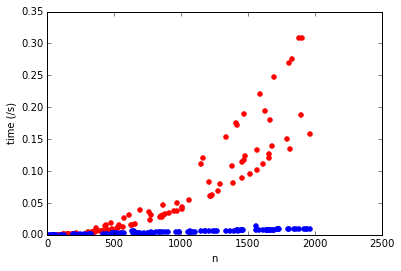

In [62]:
t_insertion = []
n_insertion = []
t_merge = []
n_merge = []

runTimes = 5
#for i in range(runTimes):

# build 100 lists to test
random_lists_insertion = [rand_list() for i in range(100)]
random_lists_merge = [rand_list() for i in range(100)]

for r_list in random_lists_insertion:
     #putting run time for insertion and merge and their lengths into the lists
    t_insertion.append(time_f(lambda: insertion_sort(r_list)))
    n_insertion.append(len(r_list))
for r_list in random_lists_merge:
    t_merge.append(time_f(lambda: merge_sort(r_list)))
    n_merge.append(len(r_list))
    
plt.scatter(n_insertion, t_insertion, color = 'red')
plt.scatter(n_merge, t_merge, color = 'blue')
plt.xlabel('n')
plt.ylabel('time (/s)')
plt.xlim(0) 
plt.ylim(0)



    
    


**Now discuss your findings in a few lines in the below cell:**

Insertion sort is in red and merge sort is in blue
We found out that at n is approximately 10 the time taken for merge sort and insertion sort to complete is roughly the same.(CLOSE TO 0.01 S)
As n increase the run time for insertion sort increase exponentially while the run  time for merge sort is increased linearly, when n is approximately 1000 the run time for merge sort is still around 0.005 s while run time for insertion sort is 0.04s.

### 1d. Implement `hybrid_sort()`

Implement `hybrid_sort()`, a `merge_sort()` variant which uses `insertion_sort()` for the base case. The problem size for which the base case is invoked has to be inferred from your above running time analysis.

In [151]:
def hybrid_sort(a):
    # complete function without changing signature
    return hybrid_sort_help(a, 0, len(a) - 1)

def hybrid_sort_help(a, first, last):
    size_for_base_case =10
    
    if first < last:
        #check if we do insertion or merge sort
        mid = math.floor((first + last) / 2)
        
        if last-first <= size_for_base_case:
            
            for j in range(first + 1, last + 1):
                key = a[j]
                i = j - 1
                while i >= 0 and a[i] > key:
                    a[i + 1] = a[i]
                    i = i - 1
                a[i + 1] = key

        else:   
            hybrid_sort_help(a, first, mid)
            hybrid_sort_help(a, mid + 1, last)
            merge(a, first, mid, last)
    return a
    pass
          

Use this test to confirm your implementation is correct.

In [152]:
x = [2, 4, 1, 3,]
print(hybrid_sort(x) == [1, 2, 3, 4])

True


### 1e. Analyse all three sorting implementations together

Draw a graph showing the running time performance of your `insertion_sort()`, `merge_sort()` and `hybrid_sort()` for different lengths of random integers.

(0, 0.35000000000000003)

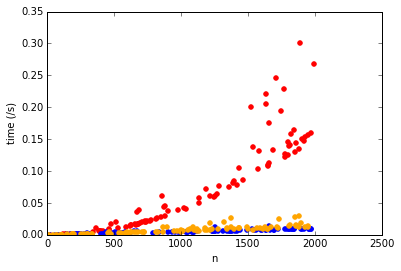

In [153]:
t_insertion = []
n_insertion = []
t_merge = []
n_merge = []
t_hybrid = []
n_hybrid = []

# build 100 lists to test
random_lists_insertion = [rand_list() for i in range(100)]
random_lists_merge = [rand_list() for i in range(100)]
random_lists_hybrid = [rand_list() for i in range(100)]


for r_list in random_lists_insertion:
    #putting run time for insertion and merge and their lengths into the lists
    t_insertion.append(time_f(lambda: insertion_sort(r_list)))
    n_insertion.append(len(r_list))
for r_list in random_lists_merge:
    t_merge.append(time_f(lambda: merge_sort(r_list)))
    n_merge.append(len(r_list))
for r_list in random_lists_hybrid:
    t_hybrid.append(time_f(lambda: hybrid_sort(r_list)))
    n_hybrid.append(len(r_list))
    
plt.scatter(n_insertion, t_insertion, color = 'red')
plt.scatter(n_merge, t_merge, color = 'blue')
plt.scatter(n_hybrid, t_hybrid, color = 'orange')
plt.xlabel('n')
plt.ylabel('time (/s)')
plt.xlim(0)
plt.ylim(0)

**Now discuss your findings in a few lines in the below cell:**

Red is insertion sort.
Blue is merge sort.
orange is hybrid sort.

We took the number n to be 4 when the hybrid sort use the base case (insertion sort)

As shown in the graph the insertion sort still takes exponantial time as n increase, and merge sort is still linear as n increase as we didn't change their implementations

Hybrid sort also take a linear time similar to merge sort.
